In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [64]:
training_data = np.load('TF_dataset.npz')
# targets = 13*xs + 7*zs - 12 + noise
input_size = 2
output_size = 1

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer='sgd', loss='mean_squared_error')
#model.compile(optimizer='sgd', loss='mean_absolute_error')
#model.compile(optimizer='sgd', loss='mean_squared_logarithmic_error')
#model.compile(optimizer='sgd', loss='hinge')
# #err model.compile(optimizer='sgd', loss='squared_hinge') #err
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(optimizer='rmsprop', loss='mean_squared_error')
#model.compile(optimizer='adagrad', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=10, verbose=1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6090.9971   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3328.1868 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2335.8337
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1701.2500 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1442.1447
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1326.1549 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1226.4863
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1115.0452 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1058.7618
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 981.0626


In [66]:
model.layers[0].get_weights()

[array([[-10.331615  ,   0.4722052 ,  12.762462  , -10.709683  ,
          -6.372647  ],
        [ -6.946998  ,   9.382946  ,  -0.15131067,   2.7103672 ,
          -8.238713  ]], dtype=float32),
 array([ 0.91982454,  8.549406  ,  3.839533  , -4.2369556 ,  1.4913715 ],
       dtype=float32)]

In [67]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-7.870e+01],
       [ 7.120e+01],
       [-4.730e+01],
       [ 6.160e+01],
       [ 7.120e+01],
       [ 5.330e+01],
       [-1.211e+02],
       [ 6.160e+01],
       [-9.070e+01],
       [ 7.120e+01],
       [-4.680e+01],
       [-1.211e+02],
       [-3.650e+01],
       [ 7.120e+01],
       [-8.180e+01],
       [ 2.000e-01],
       [-2.310e+01],
       [ 4.000e-01],
       [-1.211e+02],
       [-7.900e+01],
       [ 1.960e+01],
       [ 5.780e+01],
       [-7.900e+01],
       [ 7.120e+01],
       [ 1.400e+00],
       [-1.210e+02],
       [-1.211e+02],
       [-7.900e+01],
       [-2.320e+01],
       [-1.211e+02],
       [-8.410e+01],
       [ 2.000e-01],
       [ 7.120e+01],
       [-1.165e+02],
       [ 1.960e+01],
       [-7.900e+01],
       [-1.211e+02],
       [-2.300e+01],
       [-8.170e+01],
       [ 7.120e+01],
       [ 6.160e+01],
       [-1.211e+02],
       [-7.900e+01],
       [ 7.120e+01],
       [ 2.000e-01],
       [ 2.000e-01],
       [-1.001e+02],
       [-2.31

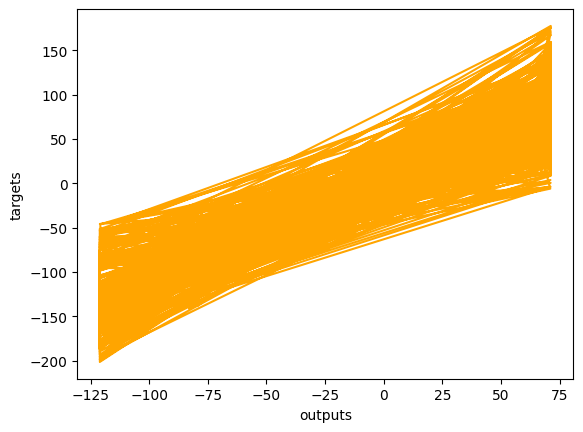

In [68]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),
         np.squeeze(training_data['targets']), color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()